In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

#importing dataset
df = pd.read_csv("data.csv")

In [2]:
#displaying the first 5 rows
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3271 non-null   object 
 1   MinTemp        3271 non-null   float64
 2   MaxTemp        3271 non-null   float64
 3   Rainfall       3271 non-null   float64
 4   Evaporation    3271 non-null   float64
 5   Sunshine       3271 non-null   float64
 6   WindGustDir    3271 non-null   object 
 7   WindGustSpeed  3271 non-null   int64  
 8   WindDir9am     3271 non-null   object 
 9   WindDir3pm     3271 non-null   object 
 10  WindSpeed9am   3271 non-null   int64  
 11  WindSpeed3pm   3271 non-null   int64  
 12  Humidity9am    3271 non-null   int64  
 13  Humidity3pm    3271 non-null   int64  
 14  Pressure9am    3271 non-null   float64
 15  Pressure3pm    3271 non-null   float64
 16  Cloud9am       3271 non-null   int64  
 17  Cloud3pm       3271 non-null   int64  
 18  Temp9am 

In [4]:
# Checking the columns types
df.dtypes

Date              object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed      int64
WindDir9am        object
WindDir3pm        object
WindSpeed9am       int64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [5]:
# Dropping the Date column
df.drop("Date", axis=1, inplace=True)

In [6]:
# Checking for null values
df.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [7]:
# Getting a list of
obj = df.dtypes == "object"
obj_cols = list(obj[obj].index)
obj_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [8]:
# Changing the categorical columns to numerical ones, without the Target feature, which is the last one
df_processed = pd.get_dummies(data=df, columns=obj_cols[:-1])
df_processed

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,19.5,22.4,15.6,6.2,0.0,41,17,20,92,84,...,0,0,0,1,0,0,0,0,0,1
1,19.5,25.6,6.0,3.4,2.7,41,9,13,83,73,...,0,0,0,0,0,0,0,0,0,1
2,21.6,24.5,6.6,2.4,0.1,41,17,2,88,86,...,0,0,0,0,0,0,0,0,0,1
3,20.2,22.8,18.8,2.2,0.0,41,22,20,83,90,...,0,0,0,0,0,0,0,0,0,1
4,19.7,25.7,77.4,4.8,0.0,41,11,6,88,74,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3266,8.6,19.6,0.0,2.0,7.8,37,22,20,73,52,...,0,0,1,0,0,0,0,0,1,0
3267,9.3,19.2,0.0,2.0,9.2,30,20,7,78,53,...,0,0,0,0,0,0,0,0,1,0
3268,9.4,17.7,0.0,2.4,2.7,24,15,13,85,56,...,0,0,0,0,0,0,0,0,1,0
3269,10.1,19.3,0.0,1.4,9.3,43,17,19,56,35,...,0,0,0,0,0,1,0,0,1,0


In [9]:
print("Shape with categorical features: ",df.shape)
print("Shape without categorical features: ",df_processed.shape)

Shape with categorical features:  (3271, 21)
Shape without categorical features:  (3271, 67)


In [10]:
# Changing the target feature to be 1s and 0s instead of Yes and No
df_processed.replace(["Yes","No"],[1,0],inplace=True)

In [11]:
Target = "RainTomorrow"
X = df_processed.drop(Target, axis=1)
Y = df_processed[Target]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)

for model in ["LoR","SVM","KNNC","DTC","RFC"]:
    if model == "DTC":
        model = DecisionTreeClassifier()
    if model == "RFC":
        model = RandomForestClassifier()
    if model == "SVM":
        model = SVC()
    if model == "KNNC":
        model = KNeighborsClassifier()
    if model == "LoR":
        model = LogisticRegression()

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("=================|| ",model," ||=================")
    print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))
    # print("Accuracy = ",accuracy_score(y_test, y_pred))
    # print("Calssification Report = \n",metrics.classification_report(y_test, y_pred))

=================||  LogisticRegression()  ||=================
F1 = 64.50 %
=================||  SVC()  ||=================
F1 = 0.00 %
=================||  KNeighborsClassifier()  ||=================
F1 = 61.76 %
=================||  DecisionTreeClassifier()  ||=================
F1 = 57.42 %
=================||  RandomForestClassifier()  ||=================
F1 = 68.21 %


In [13]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.25, random_state=47)

In [38]:
print("With standardisation:")
for model in ["LoR","SVM","KNNC","DTC","RFC"]:
    if model == "DTC":
        model = DecisionTreeClassifier()
    if model == "RFC":
        model = RandomForestClassifier()
    if model == "SVM":
        model = SVC()
    if model == "KNNC":
        model = KNeighborsClassifier(n_neighbors=7)
    if model == "LoR":
        model = LogisticRegression()

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("=================|| ",model," ||=================")
    print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))

With standardisation:
=================||  LogisticRegression()  ||=================
F1 = 64.50 %
=================||  SVC()  ||=================
F1 = 0.00 %
=================||  KNeighborsClassifier(n_neighbors=7)  ||=================
F1 = 62.39 %
=================||  DecisionTreeClassifier()  ||=================
F1 = 56.45 %
=================||  RandomForestClassifier()  ||=================
F1 = 66.47 %


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)

for n in range(1,11):
    model = KNeighborsClassifier(n_neighbors=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("=================|| N= ",n," ||=================")
    print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))


# n=7 is the best

=================|| N=  1  ||=================
F1 = 56.72 %
=================|| N=  2  ||=================
F1 = 51.66 %
=================|| N=  3  ||=================
F1 = 59.08 %
=================|| N=  4  ||=================
F1 = 55.87 %
=================|| N=  5  ||=================
F1 = 61.76 %
=================|| N=  6  ||=================
F1 = 59.08 %
=================|| N=  7  ||=================
F1 = 62.39 %
=================|| N=  8  ||=================
F1 = 59.56 %
=================|| N=  9  ||=================
F1 = 61.13 %
=================|| N=  10  ||=================
F1 = 60.68 %


In [16]:
# Define the grid of hyperparameters to search
parameters = {'n_estimators': [100, 200, 300],
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 5, 10]}
# Initialize the model
model = RandomForestClassifier()

# Initiate grid search
grid_search = GridSearchCV(model, parameters, cv=5)

# Fit model
grid_search.fit(x_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Best score
print(grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_


KeyboardInterrupt



In [81]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)
print("Results after hyper param tuning:")
for model in ["LoR","SVM","KNNC","DTC","RFC"]:
    if model == "DTC":
        model = DecisionTreeClassifier(min_samples_leaf= 4, random_state=47)
    if model == "RFC":
        model = RandomForestClassifier(min_samples_split= 5, n_estimators= 400, random_state=47)
    if model == "SVM":
        model = SVC(kernel="linear")
    if model == "KNNC":
        model = KNeighborsClassifier(n_neighbors=7)
    if model == "LoR":
        model = LogisticRegression(solver="sag",multi_class="multinomial")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("=================|| ",model," ||=================")
    print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))
    # print("Accuracy = ",accuracy_score(y_test, y_pred))

Results after hyper param tuning:
=================||  LogisticRegression(multi_class='multinomial', solver='sag')  ||=================
F1 = 66.30 %
=================||  SVC(kernel='linear')  ||=================
F1 = 63.04 %
=================||  KNeighborsClassifier(n_neighbors=7)  ||=================
F1 = 62.39 %
=================||  DecisionTreeClassifier(min_samples_leaf=4, random_state=47)  ||=================
F1 = 60.20 %
=================||  RandomForestClassifier(min_samples_split=5, n_estimators=400, random_state=47)  ||=================
F1 = 69.71 %


In [82]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.25, random_state=47)
print("Results with standardisation after hyper param tuning:")
for model in ["LoR","SVM","KNNC","DTC","RFC"]:
    if model == "DTC":
        model = DecisionTreeClassifier(min_samples_leaf= 4, random_state=47)
    if model == "RFC":
        model = RandomForestClassifier(min_samples_split= 5, n_estimators= 400, random_state=47)
    if model == "SVM":
        model = SVC(kernel="linear")
    if model == "KNNC":
        model = KNeighborsClassifier(n_neighbors=7)
    if model == "LoR":
        model = LogisticRegression(solver="sag",multi_class="multinomial")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("=================|| ",model," ||=================")
    print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))

Results with standardisation after hyper param tuning:
=================||  LogisticRegression(multi_class='multinomial', solver='sag')  ||=================
F1 = 64.02 %
=================||  SVC(kernel='linear')  ||=================
F1 = 62.57 %
=================||  KNeighborsClassifier(n_neighbors=7)  ||=================
F1 = 52.04 %
=================||  DecisionTreeClassifier(min_samples_leaf=4, random_state=47)  ||=================
F1 = 60.20 %
=================||  RandomForestClassifier(min_samples_split=5, n_estimators=400, random_state=47)  ||=================
F1 = 70.66 %


In [84]:
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
print("THE BEST ALGORITHM")
x_train, x_test, y_train, y_test = train_test_split(X_standard, Y, test_size=0.25, random_state=47)
model = RandomForestClassifier(min_samples_split= 5, n_estimators= 400, random_state=47)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))
print("Accuracy = ",accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

THE BEST ALGORITHM
F1 = 70.66 %
Accuracy =  0.8740831295843521
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       618
           1       0.82      0.62      0.71       200

    accuracy                           0.87       818
   macro avg       0.85      0.79      0.81       818
weighted avg       0.87      0.87      0.87       818



In [86]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
cf_matrix

array([[591,  27],
       [ 76, 124]], dtype=int64)

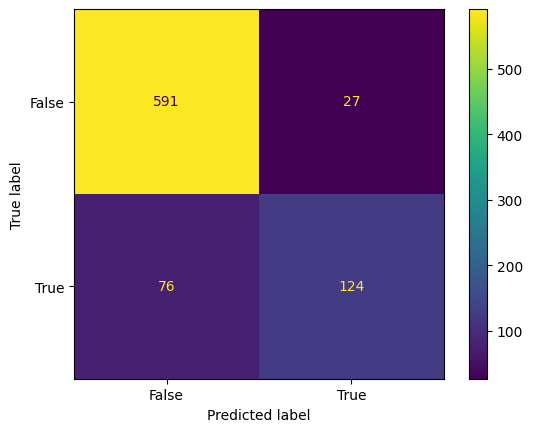

In [91]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

<AxesSubplot: >

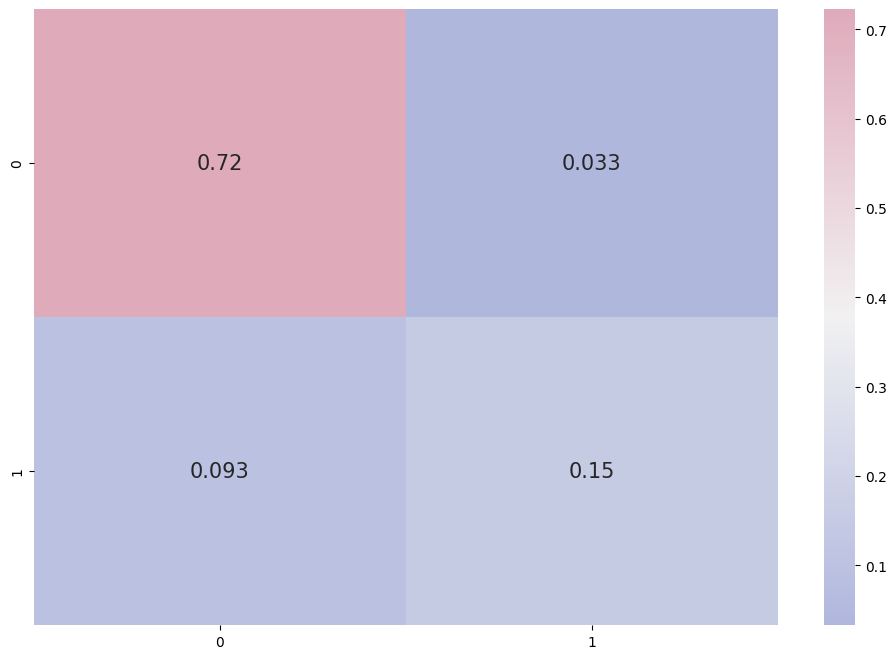

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

[====================================================================================]

So in summary, the model performs quite well for class 0 but has more room for improvement for class 1.
The overall accuracy is decent but there are some class-level issues, as indicated by the class 1 metrics.


[====================================================================================]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)


model = SVC(kernel="linear")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("=================|| degree= ",n," ||=================")
print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))

=================|| degree=  5  ||=================
F1 = 63.04 %


In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)

model = DecisionTreeClassifier(min_samples_leaf= 4, random_state=47)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))

F1 = 60.20 %


In [80]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=47)

model = LogisticRegression(solver="sag",multi_class="multinomial")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("F1 = {:.2f} %".format(f1_score(y_test, y_pred)*100))

F1 = 66.30 %


In [87]:
x_test.shape

(818, 66)